<a href="https://colab.research.google.com/github/Snapperr/Machine-Learning/blob/main/QUIZ1_2341720223_Mikaila_Kafka_Akmalsyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [2]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [4]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [5]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Data Size
df.shape

(48842, 15)

In [7]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [12]:
df.info()

print(df.isnull().sum())

for col in df.columns:
    print(col, (df[col] == "?").sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
age                 0
workclass         963
fnlwgt              0
education           0
educa

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [15]:
df = df.replace("?", np.nan)

print("=== Missing sebelum imputasi ===")
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("\n=== Missing setelah imputasi ===")
print(df.isnull().sum())


=== Missing sebelum imputasi ===
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

=== Missing setelah imputasi ===
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [21]:
quantitative_cols = df.select_dtypes(include=np.number).columns
print("Quantitative variables:", quantitative_cols)

for col in quantitative_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())

Quantitative variables: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values for fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values for education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for capital-gain:
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  545

### Explanation of Part 1 Tasks

**Task 1: Data Loading and Inspection**
- This task involved loading the dataset and performing an initial inspection to understand its structure and identify any missing values. We used `df.info()` to get a summary of the DataFrame, including data types and non-null counts, and `df.isnull().sum()` to count the number of missing values in each column. We also filtered to show only columns with missing values.

**Task 2: Data Imputation**
- In this task, we handled the missing values identified in Task 1. We used a loop to iterate through the columns with missing values and `df[col].fillna(df[col].mode()[0], inplace=True)` to fill the missing entries with the mode of each respective column. After imputation, we used `df.isnull().sum()` again to verify that there were no longer any missing values.

**Task 3: Quantitative Variable Inspection and Cleaning**
- This task focused on examining the quantitative variables in the dataset and performing some basic cleaning. We used `df.select_dtypes(include=np.number).columns` to identify quantitative columns and iterated through them to print their unique values using `df[col].unique()`. We also checked descriptive statistics using `df.describe()`. For cleaning, we used `df.columns.str.strip()` to remove leading/trailing spaces from column names and a loop with `df[col].str.strip()` to remove spaces from string values in categorical columns.

# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

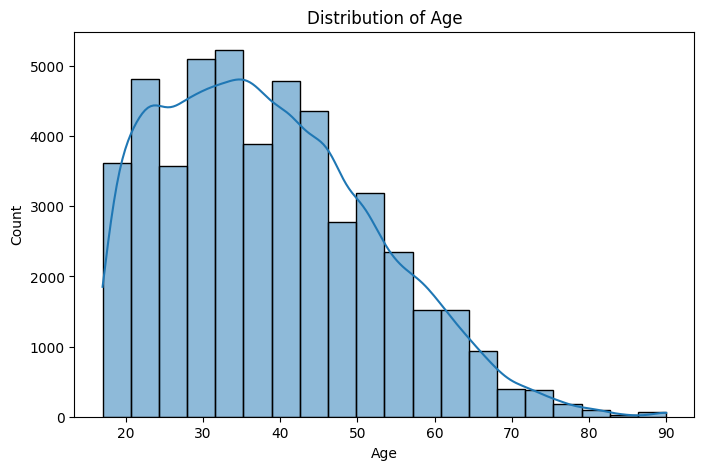

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

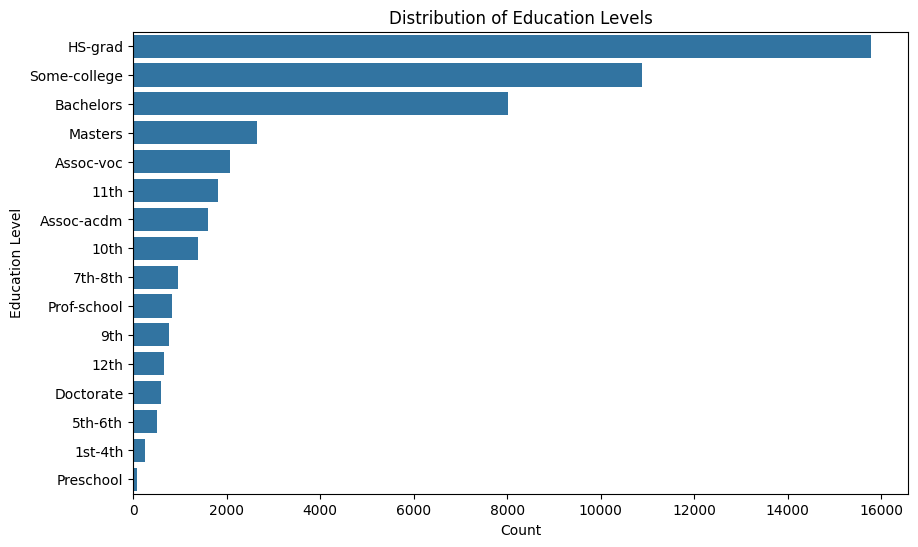

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y='education', data=df, order = df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

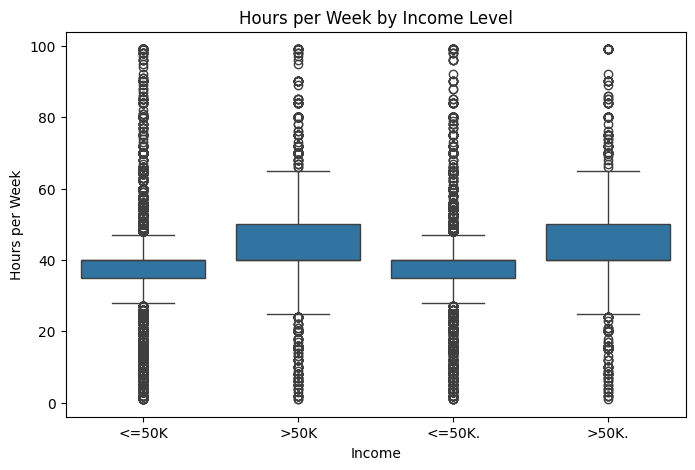

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

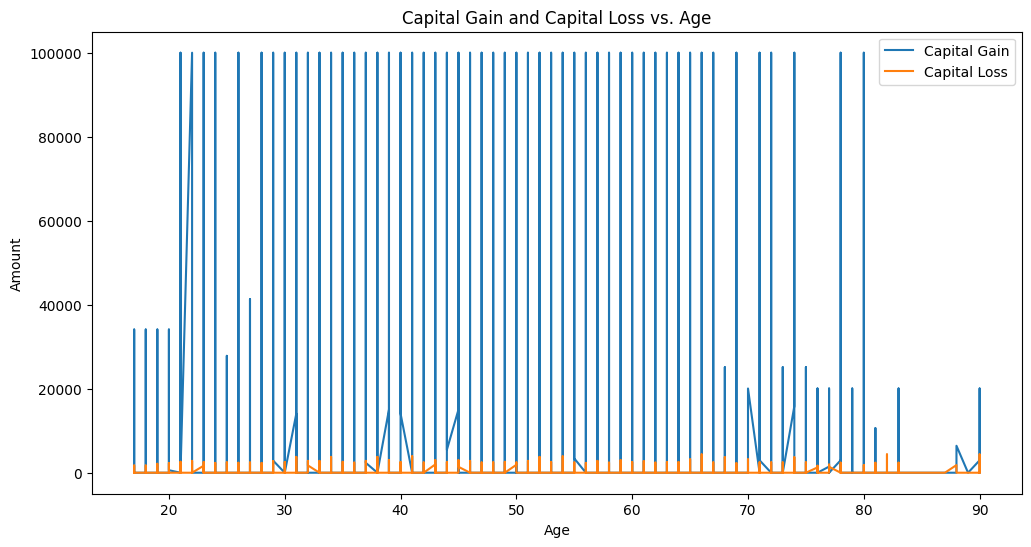

In [32]:
df_sorted_age = df.sort_values('age')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted_age['age'], df_sorted_age['capital-gain'], label='Capital Gain')
plt.plot(df_sorted_age['age'], df_sorted_age['capital-loss'], label='Capital Loss')
plt.title('Capital Gain and Capital Loss vs. Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [22]:

'''
  1. What kind of distribution showed in 'age'?
  # The histogram of 'age' shows a right-skewed distribution, with a peak in the younger to middle-aged range and a long tail extending towards older ages.

  2. If you find missing values in 'age', what kind of data impute method will you use? Why?
  # If there were missing values in 'age', I would likely use the median for imputation. The median is less sensitive to outliers compared to the mean, and the 'age' distribution appears to have a few older individuals which could be considered outliers in some contexts.

  3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?
  # To determine the number of outliers for each income category in 'hours-per-week', we would typically use a method like the Interquartile Range (IQR). The boxplot visually suggests that both income categories (<=50K and >50K) have outliers in 'hours-per-week', represented by the individual points beyond the whiskers. To get the exact number, we would need to calculate the IQR and define outliers as values outside 1.5 * IQR from the quartiles. Visually, the '<=50K' category appears to have more outliers, particularly on the higher end of hours worked per week.
'''

"\n  1. What kind of distribution showed in 'age'?\n  # The histogram of 'age' shows a right-skewed distribution, with a peak in the younger to middle-aged range and a long tail extending towards older ages.\n\n  2. If you find missing values in 'age', what kind of data impute method will you use? Why?\n  # If there were missing values in 'age', I would likely use the median for imputation. The median is less sensitive to outliers compared to the mean, and the 'age' distribution appears to have a few older individuals which could be considered outliers in some contexts.\n\n  3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?\n  # To determine the number of outliers for each income category in 'hours-per-week', we would typically use a method like the Interquartile Range (IQR). The boxplot visually suggests that both income categories (<=50K and >50K) have outliers in 'hours-per-week', represented by the individual poi

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [43]:

from sklearn.preprocessing import LabelEncoder

# sex
le_sex = LabelEncoder()
df['sex_encoded'] = le_sex.fit_transform(df['sex'])

# income (target)
le_income = LabelEncoder()
df['income_encoded'] = le_income.fit_transform(df['income'])

# Cek hasil
print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())


   sex  sex_encoded  income  income_encoded
0    1            1       0               0
1    1            1       0               0
2    1            1       0               0
3    1            1       0               0
4    0            0       0               0


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

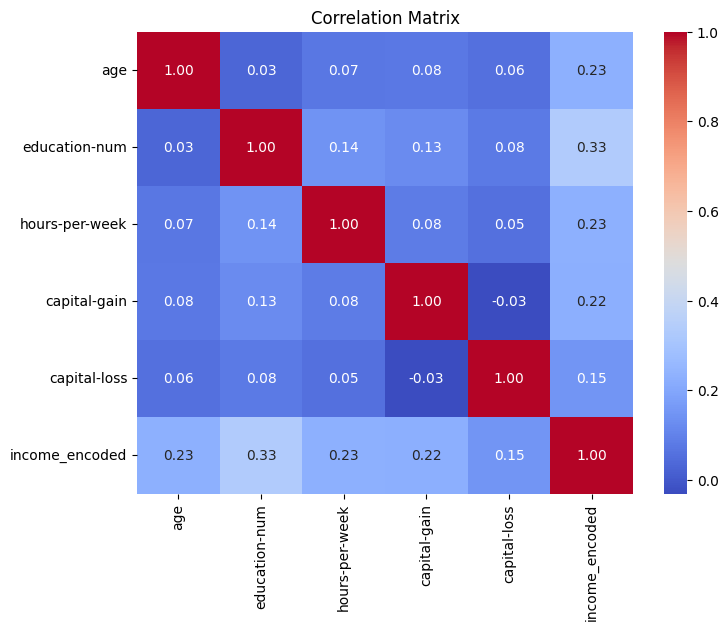

,age,education-num,hours-per-week,capital-gain,capital-loss,income_encoded
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income_encoded,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


In [44]:
# Pilih variabel
corr_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income_encoded']
corr = df[corr_vars].corr()

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

corr


In [45]:
"""
Interpretasi:
1. Age punya korelasi positif dengan income_encoded (semakin tua, cenderung lebih berpenghasilan >50K).
2. Education-num punya korelasi paling kuat dengan income_encoded (pendidikan lebih tinggi → peluang >50K lebih besar).
3. Hours-per-week juga positif, artinya kerja lebih lama → lebih besar peluang >50K.
4. Capital-gain sangat kuat korelasinya dengan income_encoded, logis karena capital gain = penghasilan tambahan.
5. Capital-loss punya korelasi kecil, tapi tetap ada hubungannya.
"""

'\nInterpretasi:\n1. Age punya korelasi positif dengan income_encoded (semakin tua, cenderung lebih berpenghasilan >50K).\n2. Education-num punya korelasi paling kuat dengan income_encoded (pendidikan lebih tinggi → peluang >50K lebih besar).\n3. Hours-per-week juga positif, artinya kerja lebih lama → lebih besar peluang >50K.\n4. Capital-gain sangat kuat korelasinya dengan income_encoded, logis karena capital gain = penghasilan tambahan.\n5. Capital-loss punya korelasi kecil, tapi tetap ada hubungannya.\n'

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [52]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


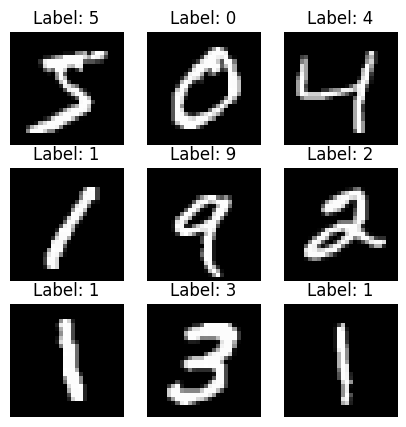

In [53]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

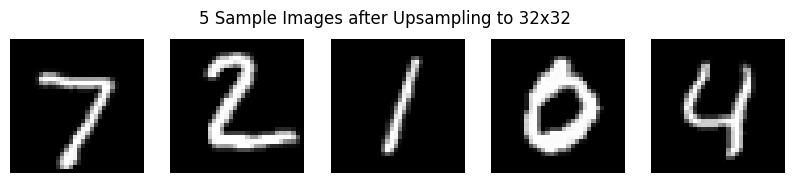

In [57]:
from tensorflow.keras.datasets import mnist
import cv2

# Load MNIST test
(_, _), (X_test, y_test) = mnist.load_data()

# simpan hasil upsampling
X_test_resized = np.zeros((X_test.shape[0], 32, 32))

# 32x32
for i in range(len(X_test)):
    X_test_resized[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

# Tampilkan sampel hasil
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.axis("off")
plt.suptitle("5 Sample Images after Upsampling to 32x32")
plt.show()


## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

Normalized range:  0.0 to 1.0


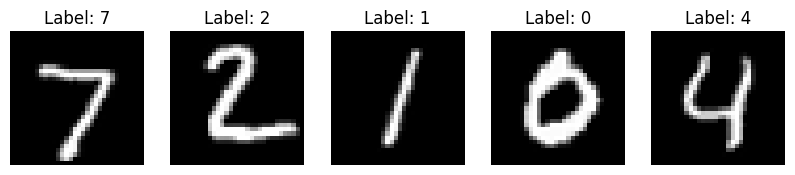

In [58]:
X_test_norm = X_test_resized / 255.0
print("Normalized range: ", X_test_norm.min(), "to", X_test_norm.max())

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_norm[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [64]:
X_test_flat = X_test_norm.reshape((X_test_norm.shape[0], -1))

print("Shape setelah flatten:", X_test_flat.shape)

# cross check saja
print("Label sample:", y_test[0])
print("Pixel data sample (10 pertama):", X_test_flat[0][:10])


Shape setelah flatten: (10000, 1024)
Label sample: 7
Pixel data sample (10 pertama): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
